In [ ]:
'''Do feature engineering and split the dataset 70-30.
And train the model to 30% of the dataset on a linear regression model and compare accuracy.'''

In [120]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [121]:
h=pd.read_csv("C:\\Users\\acer\\Desktop\\machine\\kc_house_data.csv")

In [122]:
h.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [138]:
h.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [155]:
living = np.array(h["sqft_living"])
living_scaled = preprocessing.scale(living)
living_scaled

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([-0.97983502,  0.53363434, -1.42625404, ..., -1.15404732,
       -0.52252773, -1.15404732])

In [156]:
price=np.array(h["price"])
price_scaled=preprocessing.scale(price)
price_scaled

array([-0.86671733, -0.00568792, -0.98084935, ..., -0.37586519,
       -0.38158814, -0.58588173])

In [157]:
price_scaled=price_scaled.reshape(-1,1)
living_scaled=living_scaled.reshape(-1,1)
living_scaled

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(living_scaled,price_scaled,test_size=0.30)

In [159]:
reg=LinearRegression()

In [161]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
y_pred=reg.predict(X_test)


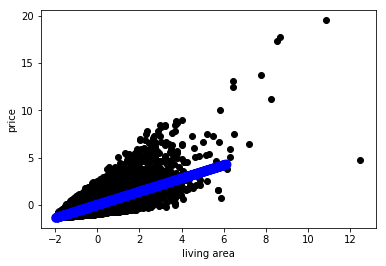

In [167]:
plt.scatter(X_train, Y_train,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=10)
plt.xlabel("living area")
plt.ylabel("price")
plt.show()